In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [22]:
df_customers = pd.read_csv('twm_customer.csv', ';')

In [23]:
df_customers.head()

cust_id  income  age  years_with_bank  nbr_children gender  marital_status  \
0  1362691   26150   46                5             1     M                2   
1  1362487    6605   71                1             0     M                2   
2  1363160   18548   38                8             0     F                1   
3  1362752   47668   54                3             0     F                1   
4  1362548   44554   59                9             2     F                4   

  name_prefix                                         first_name  \
0              Donald                                        ...   
1              ChingDyi                                      ...   
2              Rosa                                          ...   
3              Lisa                                          ...   
4              Barbara                                       ...   

                                           last_name  street_nbr  \
0  Marek                                         ...        8298   
1  Moussavi                                      ...       10603   
2  Johnston                                      ...        8817   
3  Martin                                        ...         676   
4  O'Malley                                      ...        6578   

                                         street_name  postal_code  \
0  Second                                        ...        89194   
1  Daffodil                                      ...        90159   
2  Figueroa                                      ...        90024   
3  Humble                                        ...        90172   
4  C                                             ...        10138   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [24]:
# elbow rule df_customers
df_customers['marital_status'] = df_customers['marital_status'].astype('category')
segmentation_cols = ['income','age','years_with_bank','nbr_children','gender', 'marital_status']
df_seg = df_customers[segmentation_cols]
df_seg = pd.get_dummies(df_seg, drop_first=True)
df_seg.head()
scaler = MinMaxScaler()
df_seg_scaled = pd.DataFrame(scaler.fit_transform(df_seg), columns = df_seg.columns)

In [25]:
# elbow rule function
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

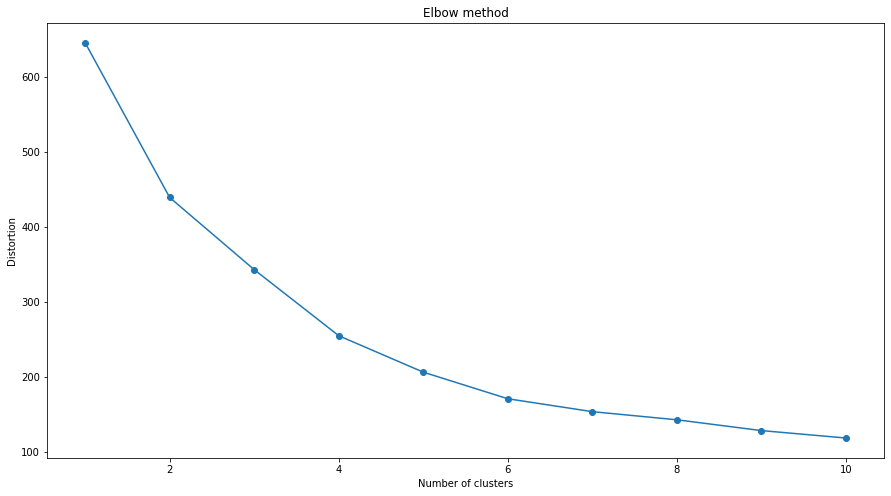

In [26]:
# elbow plot df_customers
plot_inertia(df_seg_scaled)

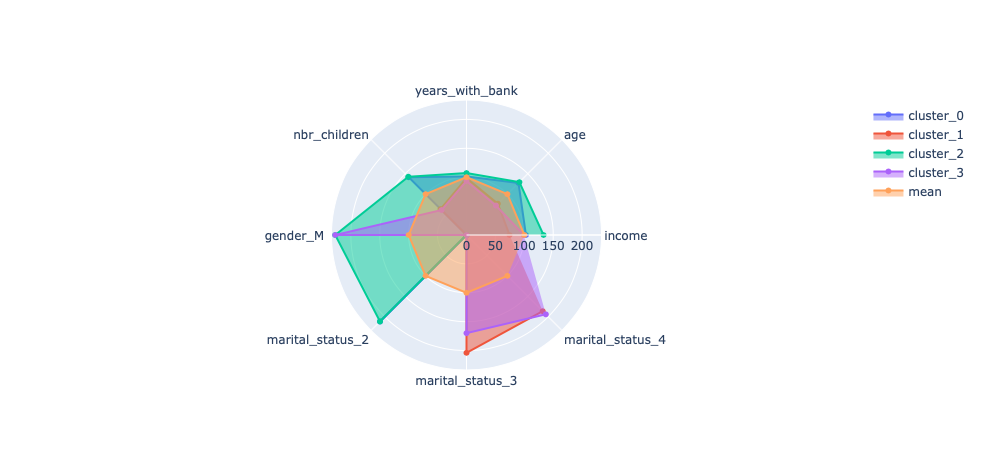

In [27]:

#assign cluster to customers
df_seg_scaled['cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(df_seg_scaled)
# clusters size
df_seg_scaled['cluster'].value_counts()
# data to radar chart
df_radar = df_seg_scaled.groupby('cluster').mean().divide(df_seg_scaled.drop('cluster',axis=1).mean())*100

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()
plot_radar_chart(df_radar)

In [28]:
df_radar.head()

income         age  years_with_bank  nbr_children   gender_M   \
cluster                                                                      
0        102.834007  127.199145       101.280608    141.367933    0.000000   
1         74.415666   76.658168        98.452542     63.529758    0.000000   
2        133.281408  129.379965       107.201138    142.446561  227.051672   
3         99.182026   72.038344        93.523311     61.041879  227.051672   

         marital_status_2  marital_status_3  marital_status_4  
cluster                                                        
0              211.614731          0.000000          0.000000  
1                0.000000        203.875546        186.400499  
2              211.614731          0.000000          0.000000  
3                0.000000        169.772727        194.025974

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_seg_scaled), columns = ['PC1', 'PC2'])
df_pca['cluster'] = df_seg_scaled['cluster']

In [31]:
df_pca.head()

PC1       PC2  cluster
0  0.645407  0.737651        2
1  0.638214  0.752585        2
2 -0.453759 -0.570920        1
3 -0.457119 -0.545622        1
4 -0.438442 -0.637150        1

In [32]:
def plot_PCA(df):
    data = []
    for cluster in df.cluster.unique():
        to_plot = df[df['cluster'] == cluster]
        data.append(go.Scatter(x=to_plot['PC1'], 
                               y=to_plot['PC2'], 
                               mode='markers', name = f'cluster_{cluster}'))
    layout = go.Layout(title="PCA",
                       xaxis_title="PC1",
                       yaxis_title="PC2",)
    fig = go.Figure(data=data,layout=layout)
    fig.show()


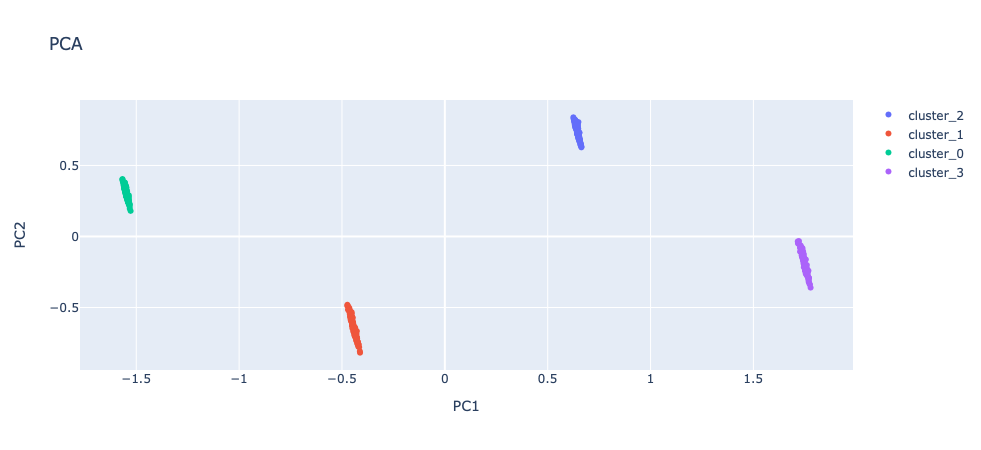

In [33]:
plot_PCA(df_pca)